# K Means Color Quantization

### Imports


In [1]:
import numpy as np

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

### The Image

In [2]:
image_as_array = mpimg.imread('../DATA/photos.jpg')

In [3]:
image_as_array # RGB CODES FOR EACH PIXEL

array([[[ 4, 11, 37],
        [ 4, 11, 37],
        [ 4, 11, 37],
        ...,
        [ 4,  9, 28],
        [ 4,  9, 28],
        [ 4,  9, 28]],

       [[ 4, 11, 37],
        [ 4, 11, 37],
        [ 4, 11, 37],
        ...,
        [ 4,  9, 28],
        [ 4,  9, 28],
        [ 4,  9, 28]],

       [[ 4, 11, 37],
        [ 4, 11, 37],
        [ 4, 11, 37],
        ...,
        [ 3,  8, 27],
        [ 3,  8, 27],
        [ 4,  9, 28]],

       ...,

       [[ 3,  1,  2],
        [ 3,  1,  2],
        [ 3,  1,  2],
        ...,
        [ 2,  0,  3],
        [ 2,  0,  3],
        [ 2,  0,  3]],

       [[ 2,  0,  1],
        [ 2,  0,  1],
        [ 2,  0,  1],
        ...,
        [ 2,  0,  3],
        [ 2,  0,  3],
        [ 2,  0,  3]],

       [[ 2,  0,  3],
        [ 2,  0,  3],
        [ 2,  0,  3],
        ...,
        [ 2,  0,  3],
        [ 2,  0,  3],
        [ 2,  0,  3]]], dtype=uint8)

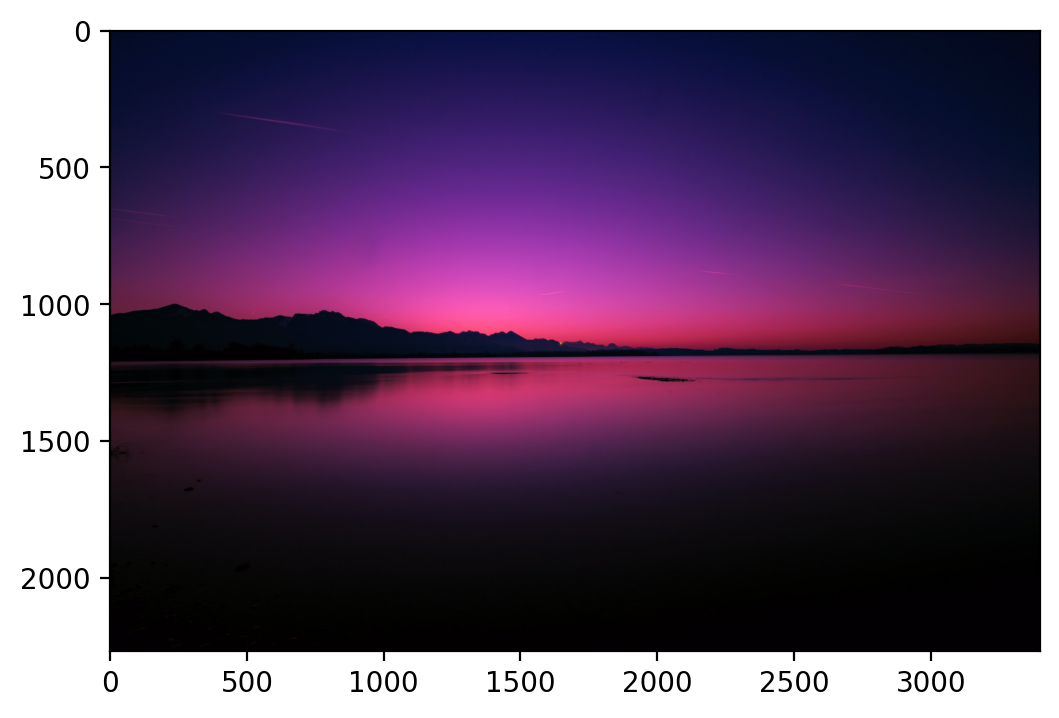

In [4]:
plt.figure(figsize=(6,6),dpi=200)
plt.imshow(image_as_array)

## Using Kmeans to Quantize Colors

Quantizing colors means we'll reduce the number of unique colors here to K unique colors. Let's try just 6 colors!

In [5]:
image_as_array.shape
# (h,w,3 color channels)

(2266, 3399, 3)

### Convert from 3d to 2d

Kmeans is designed to train on 2D data (data rows and feature columns), so we can reshape the above strip by using (h,w,c) ---> (h * w,c)

In [6]:
(h,w,c) = image_as_array.shape

In [7]:
image_as_array2d = image_as_array.reshape(h*w,c)

In [8]:
from sklearn.cluster import KMeans

In [19]:
model = KMeans(n_clusters=10)

In [20]:
model

KMeans(n_clusters=10)

In [21]:
labels = model.fit_predict(image_as_array2d)

In [22]:
labels

array([2, 2, 2, ..., 7, 7, 7])

In [23]:
# THESE ARE THE 6 RGB COLOR CODES!
model.cluster_centers_

array([[ 49.36350673,  27.21090798,  88.63853937],
       [166.36854344,  46.36677204, 100.0563446 ],
       [ 19.64511207,  14.4061996 ,  27.13034894],
       [213.30927037,  70.91336602, 165.25367273],
       [105.59279469,  35.57012038,  75.77545447],
       [143.09169785,  50.33323515, 152.55647547],
       [ 89.33920482,  37.52174462, 122.19146773],
       [  4.95189759,   4.44770977,   5.70370065],
       [ 16.26708738,  17.68252664,  60.0256703 ],
       [ 60.22656988,  25.33853212,  47.76776433]])

In [50]:
rgb_codes = model.cluster_centers_/255

In [51]:
rgb_codes.astype(float)

array([[0.19358238, 0.10670944, 0.34760212],
       [0.65242566, 0.18183048, 0.39237782],
       [0.07703966, 0.0564949 , 0.10639353],
       [0.83650694, 0.27809163, 0.64805362],
       [0.41408939, 0.13949067, 0.29715864],
       [0.56114391, 0.19738524, 0.59826069],
       [0.35034982, 0.1471441 , 0.47918223],
       [0.01941921, 0.017442  , 0.02236745],
       [0.0637925 , 0.06934324, 0.23539479],
       [0.23618263, 0.09936679, 0.18732457]])

In [52]:
quantized_image = np.reshape(rgb_codes[labels], (h, w, c)).astype(float)

In [53]:
quantized_image

array([[[0.07703966, 0.0564949 , 0.10639353],
        [0.07703966, 0.0564949 , 0.10639353],
        [0.07703966, 0.0564949 , 0.10639353],
        ...,
        [0.07703966, 0.0564949 , 0.10639353],
        [0.07703966, 0.0564949 , 0.10639353],
        [0.07703966, 0.0564949 , 0.10639353]],

       [[0.07703966, 0.0564949 , 0.10639353],
        [0.07703966, 0.0564949 , 0.10639353],
        [0.07703966, 0.0564949 , 0.10639353],
        ...,
        [0.07703966, 0.0564949 , 0.10639353],
        [0.07703966, 0.0564949 , 0.10639353],
        [0.07703966, 0.0564949 , 0.10639353]],

       [[0.07703966, 0.0564949 , 0.10639353],
        [0.07703966, 0.0564949 , 0.10639353],
        [0.07703966, 0.0564949 , 0.10639353],
        ...,
        [0.07703966, 0.0564949 , 0.10639353],
        [0.07703966, 0.0564949 , 0.10639353],
        [0.07703966, 0.0564949 , 0.10639353]],

       ...,

       [[0.01941921, 0.017442  , 0.02236745],
        [0.01941921, 0.017442  , 0.02236745],
        [0.01941921, 0

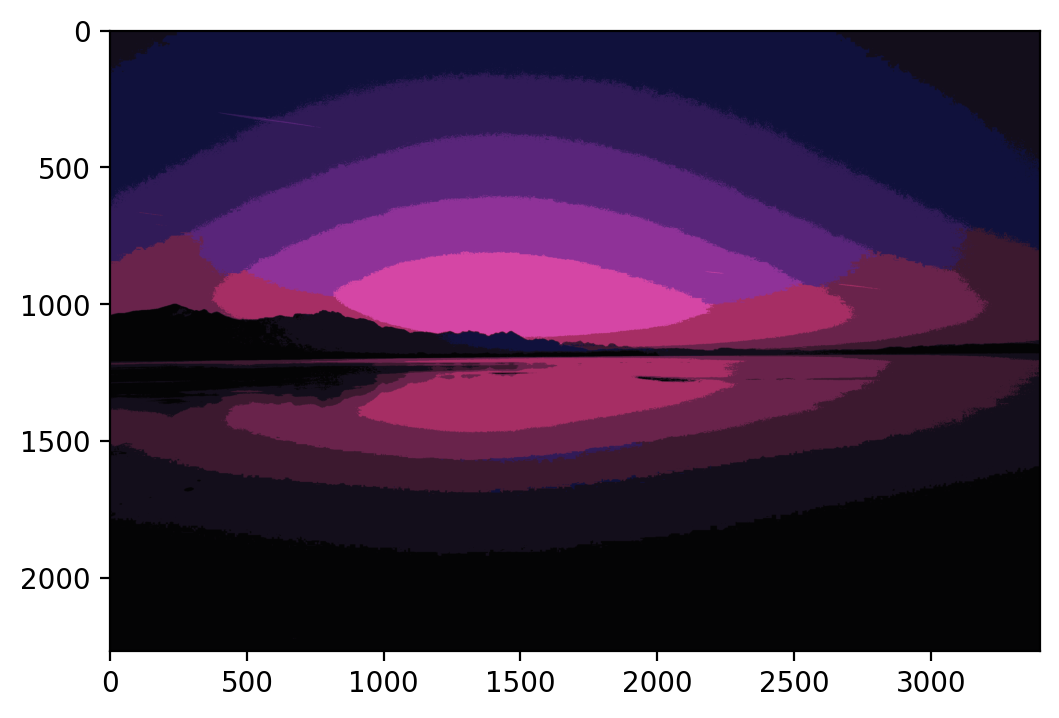

In [54]:
plt.figure(figsize=(6,6),dpi=200)
plt.imshow(quantized_image)

In [55]:
plt.imsave('file.jpg', quantized_image, dpi = 200)